## Environment setup


In [ ]:
%env DSP_CACHEBOOL=false

In [ ]:
import logging

logging.basicConfig(encoding="utf-8", level=logging.INFO)

In [ ]:
%run ./module-00-data-prep.ipynb
train = train
val = val
test = test
len(train), len(val), len(test)

## Model connection
### Open source "small" LLMs (SLMs)
* qwen2.5:0.5b
* qwen2.5:1.5b
* qwen2.5:3b
* qwen2.5:7b
* gemma2:9b
* llama3.1:8b

*gpt-4o* as a baseline and *llama3.1:8b-cyber-1* after tine-tuning

### Connections

In [ ]:
import dspy

# MODEL = "qwen2.5:1.5b"
MODEL = "llama3.1:8b-cyber-1"

lm = dspy.OllamaLocal(
    model=MODEL,
)
dspy.configure(lm=lm)

dspy.settings.configure(lm=lm)

In [ ]:
from sms_classifier import SMSClassifier

sms_classifier = SMSClassifier(lm)

## Evaluation
* test subset `Example`s dataset
* simple metric function `validate_answer`
* customized DSPy `EvaluateWithLangfuse` class for Langfuse integration

In [Langfuse](http://localhost:3000) you can find information (among others) about:
* projects
* traces - single LLM calls
* sessions - group of multiple LLM traces - sequence of LLM calls - e.g. evaluation run
* LLM latencies
* LLM costs
* LLM scores/metrics (e.g. uploaded when running LLM/prompt evaluation)

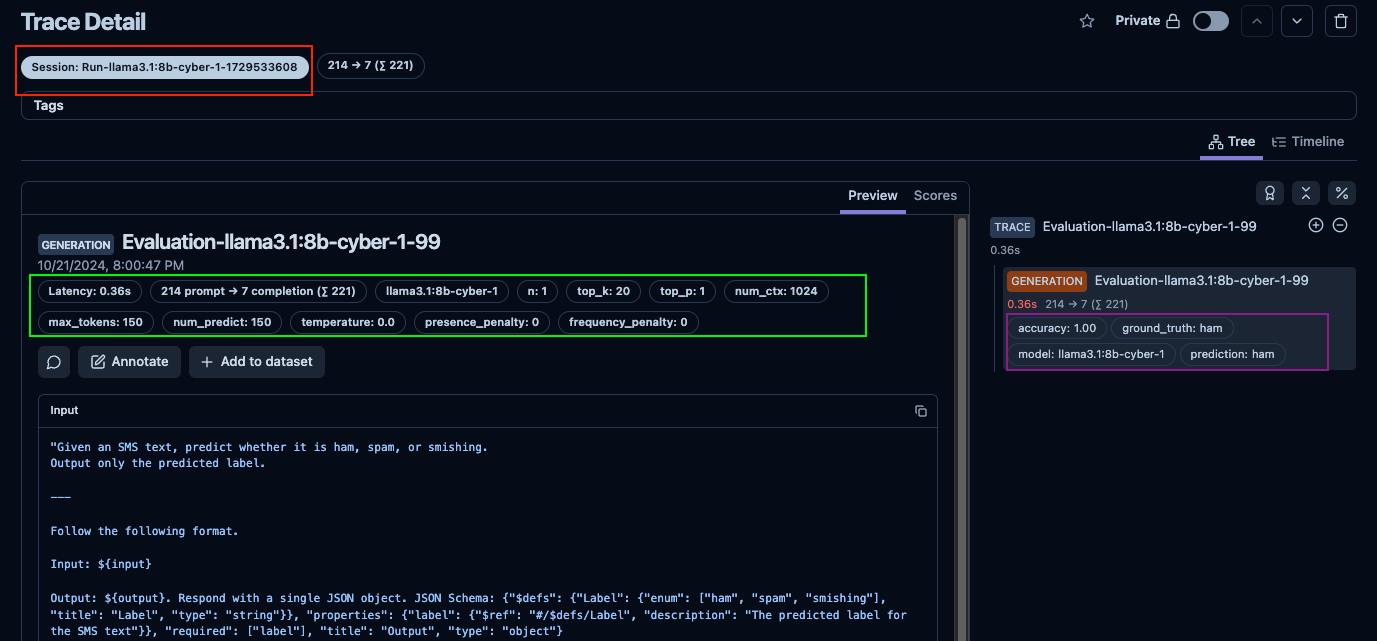

## Baseline

In [ ]:
from datetime import datetime

from evaluation_helpers import validate_answer
from langfuse_extensions import EvaluateWithLangfuse

session = f"Run-{MODEL}-{int(datetime.now().timestamp())}"
print(session)
# from evaluation_helpers import EvaluateWithLangfuse
evaluator = EvaluateWithLangfuse(
    devset=test, num_threads=1, display_progress=True, run_id=session
)
evaluator(sms_classifier, metric=validate_answer)

## Langfuse UI
